<a href="https://colab.research.google.com/github/dhanushkaputty/ML/blob/main/MLWeek2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


df = pd.read_csv("/Cars Datasets 2025.csv", encoding='cp1252')


In [7]:
df = pd.read_csv("/Cars Datasets 2025.csv", encoding='cp1252')


In [5]:
[col for col in df.columns if df[col].isnull().sum() > 0 ]

['CC/Battery Capacity', 'Performance(0 - 100 )KM/H', 'Torque']

In [7]:
constant_features = [col for col in df.columns if df[col].nunique() == 1]

print("Constant Features:", constant_features)


Constant Features: []


In [6]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


In [8]:
from sklearn.model_selection import train_test_split
X = df.drop(labels = ['Cars Prices'],axis = 1)
y = df['Cars Prices']
x_train, x_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=0
)

In [17]:

constant_num = [col for col in x_train.select_dtypes(include=['int64','float64']).columns
                if x_train[col].std() == 0]
constant_cat = [col for col in x_train.select_dtypes(include=['object']).columns
                if x_train[col].nunique() == 1]
print("Numeric Constant Features:", constant_num)
print("Categorical Constant Features:", constant_cat)
len(constant_cat)
len(constant_num)

Numeric Constant Features: []
Categorical Constant Features: []


0

In [18]:
constant_features = constant_num + constant_cat

In [19]:
x_train.drop(labels=constant_features, axis=1, inplace=True)
x_test.drop(labels=constant_features, axis=1, inplace=True)

In [20]:

print("x_train:", x_train.shape)
print("x_test:", x_test.shape)


x_train: (852, 10)
x_test: (366, 10)


In [21]:

print("x_train:", x_train.shape)
print("x_test:", x_test.shape)


x_train: (852, 10)
x_test: (366, 10)


In [22]:
remaining_constants = [col for col in x_train.columns if x_train[col].nunique() == 1]
print("Remaining constant columns:", remaining_constants)


Remaining constant columns: []


In [24]:

constant_features = constant_num + constant_cat


constant_features += ['ModelID', 'CarCode']


x_train.drop(labels=constant_features, axis=1, inplace=True, errors='ignore')
x_test.drop(labels=constant_features, axis=1, inplace=True, errors='ignore')



In [31]:
#Quasi-constant

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df.drop(labels= ['Cars Prices'], axis=1),  # X (features)
    df['Cars Prices'],                        # y (target)
    test_size=0.3,
    random_state=0
)



In [32]:
print(df.columns.tolist())


['Company Names', 'Cars Names', 'Engines', 'CC/Battery Capacity', 'HorsePower', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Cars Prices', 'Fuel Types', 'Seats', 'Torque']


In [35]:


import numpy as np

quasi_constant_feat = []

for feature in x_train.columns:
    predominant = (x_train[feature].value_counts() / float(len(x_train))).values[0]
    if predominant >= 0.99:
        quasi_constant_feat.append(feature)

print("Quasi-Constant Features:", quasi_constant_feat)


Quasi-Constant Features: []


In [36]:
x_train.drop(labels=quasi_constant_feat, axis=1, inplace=True)
x_test.drop(labels=quasi_constant_feat, axis=1, inplace=True)


In [37]:

print("x_train:", x_train.shape)
print("x_test:", x_test.shape)

x_train: (852, 10)
x_test: (366, 10)


In [39]:
# Duplicate
duplicated_feat = []
for i in range (0,len(x_train.columns)):
  col_1 = x_train.columns[i]
  for col_2 in x_train.columns[i+1:]:
    if x_train[col_1].equals(x_train[col_2]):
      duplicated_feat.append(col_2)



print("Duplicate Features:", duplicated_feat)

Duplicate Features: []


In [40]:
x_train.drop(labels=duplicated_feat, axis=1, inplace=True)
x_test.drop(labels=duplicated_feat, axis=1, inplace=True)

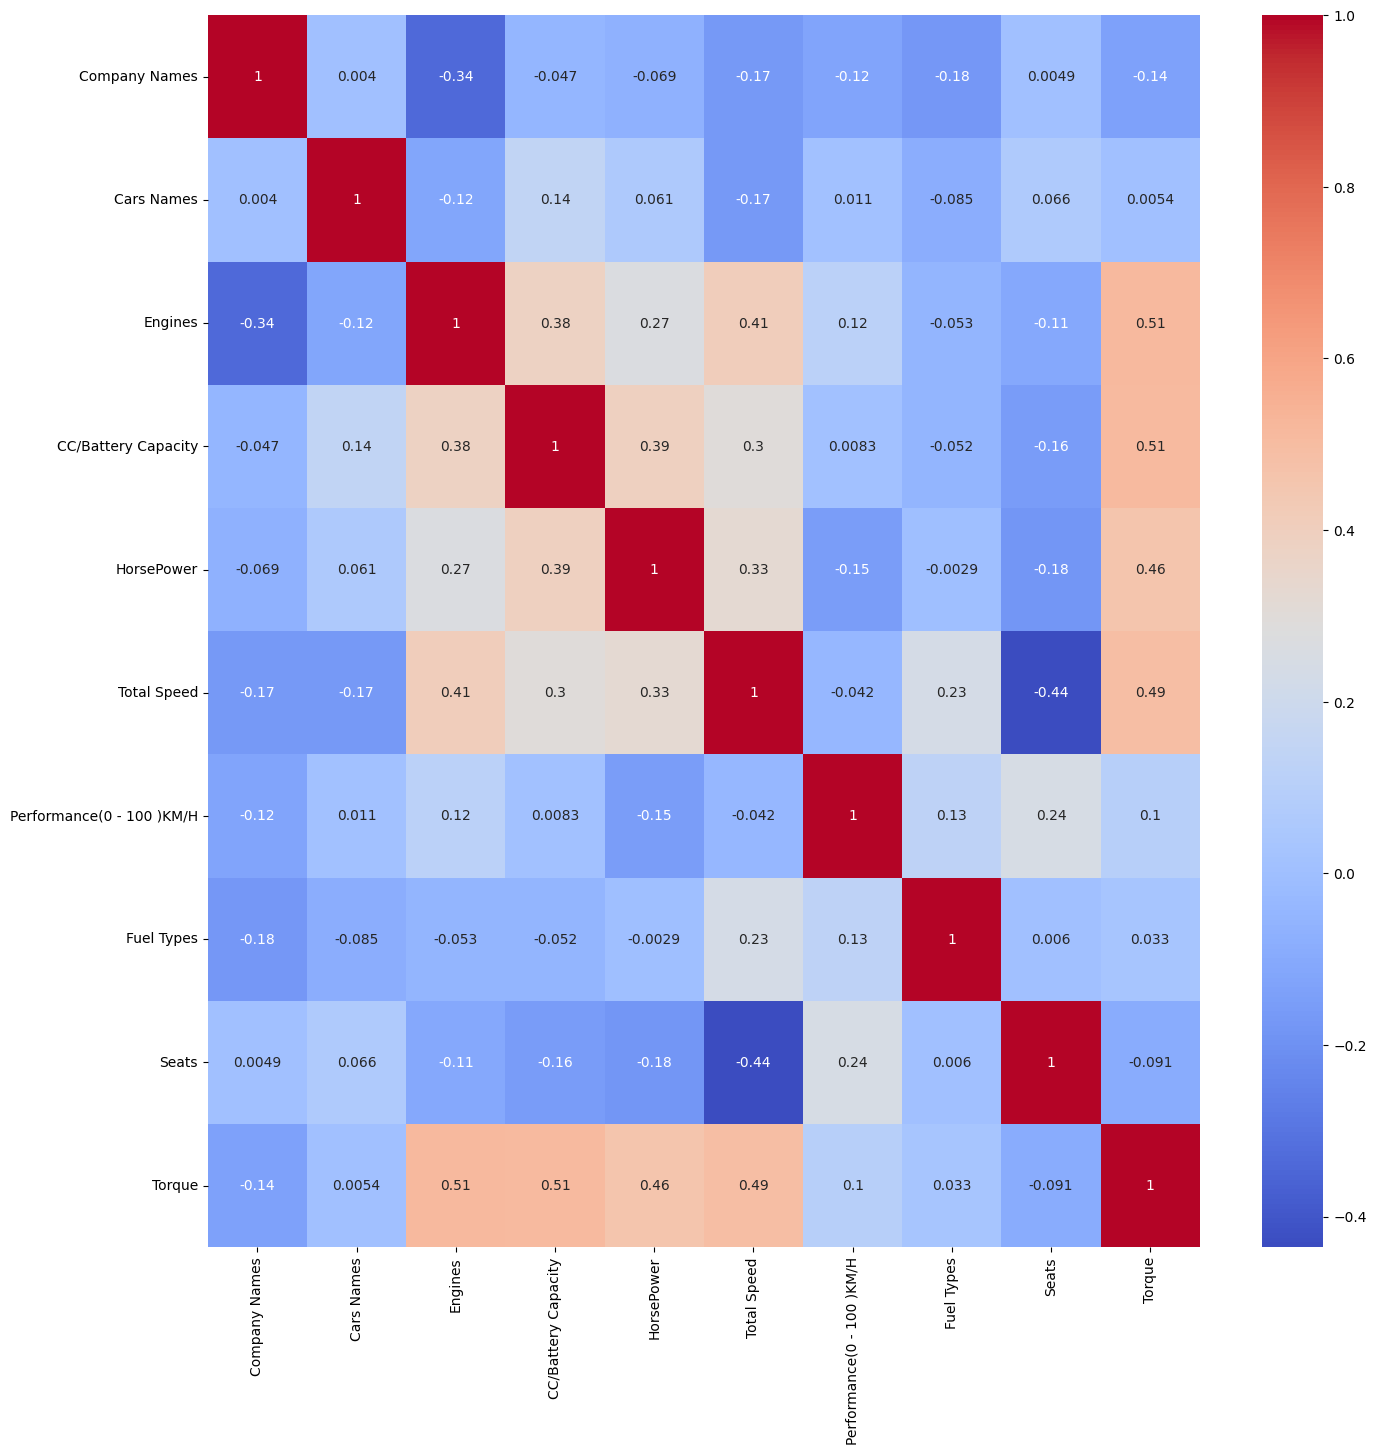

In [44]:
#Correlation
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Copy dataframe
x_train_encoded = x_train.copy()

# Label encode all categorical features
for col in x_train_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    x_train_encoded[col] = le.fit_transform(x_train_encoded[col])

# Correlation matrix
corrmat = x_train_encoded.corr()

# Plot
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(corrmat, annot=True, cmap="coolwarm")
plt.show()


In [45]:
grouped_feature_ls = []
corrrelated_groups  = []
def correlation(dataset,threshlod):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range (len(corr_matrix.columns)):
    for j in range (i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [47]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.select_dtypes(include=['int64','float64']).corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


corr_features = correlation(x_train, 0.9)
print("Correlated Features:", corr_features)
print("Number of Correlated Features:", len(corr_features))


Correlated Features: set()
Number of Correlated Features: 0


In [48]:
from sklearn.preprocessing import LabelEncoder

x_train_encoded = x_train.copy()


for col in x_train_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    x_train_encoded[col] = le.fit_transform(x_train_encoded[col])


corr_features = correlation(x_train_encoded, 0.9)
print("Correlated Features:", corr_features)
print("Number of Correlated Features:", len(corr_features))


Correlated Features: set()
Number of Correlated Features: 0


In [50]:
x_train.drop(labels=corr_features, axis=1, inplace=True, errors='ignore')
x_test.drop(labels=corr_features, axis=1, inplace=True, errors='ignore')

In [51]:
x_train.shape

(852, 10)

In [52]:
x_test.shape

(366, 10)

In [55]:
#Mutual Information
import re

# Copy target column
y_train_cleaned = y_train.copy()

# Function to clean price values
def clean_price(price):
    if isinstance(price, str):
        # Remove $ and commas
        price = price.replace('$', '').replace(',', '').strip()

        # Replace all types of dashes with a normal dash
        price = re.sub(r'[–—−]', '-', price)

        # Handle ranges
        if '-' in price:
            nums = price.split('-')
            try:
                return (float(nums[0]) + float(nums[1])) / 2  # Average of range
            except:
                return None  # If something fails
        try:
            return float(price)
        except:
            return None  # If conversion fails
    return price

# Apply cleaning function
y_train_cleaned = y_train_cleaned.apply(clean_price)

print(y_train_cleaned.head())






579     136900.0
1146     17500.0
188      28000.0
491      50000.0
1217     36000.0
Name: Cars Prices, dtype: float64


In [58]:
# Remove rows with NaN in y_train_cleaned
mask = y_train_cleaned.notna()
x_train_encoded_clean = x_train_encoded.loc[mask]
y_train_cleaned_final = y_train_cleaned.loc[mask]

print("Shape before removing NaNs:", x_train_encoded.shape)
print("Shape after removing NaNs:", x_train_encoded_clean.shape)




Shape before removing NaNs: (852, 10)
Shape after removing NaNs: (849, 10)



Mutual Information Scores:
 HorsePower                   1.027054
CC/Battery Capacity          0.971603
Engines                      0.939060
Torque                       0.930873
Company Names                0.765017
Performance(0 - 100 )KM/H    0.742324
Cars Names                   0.711319
Total Speed                  0.642809
Seats                        0.213268
Fuel Types                   0.051348
dtype: float64


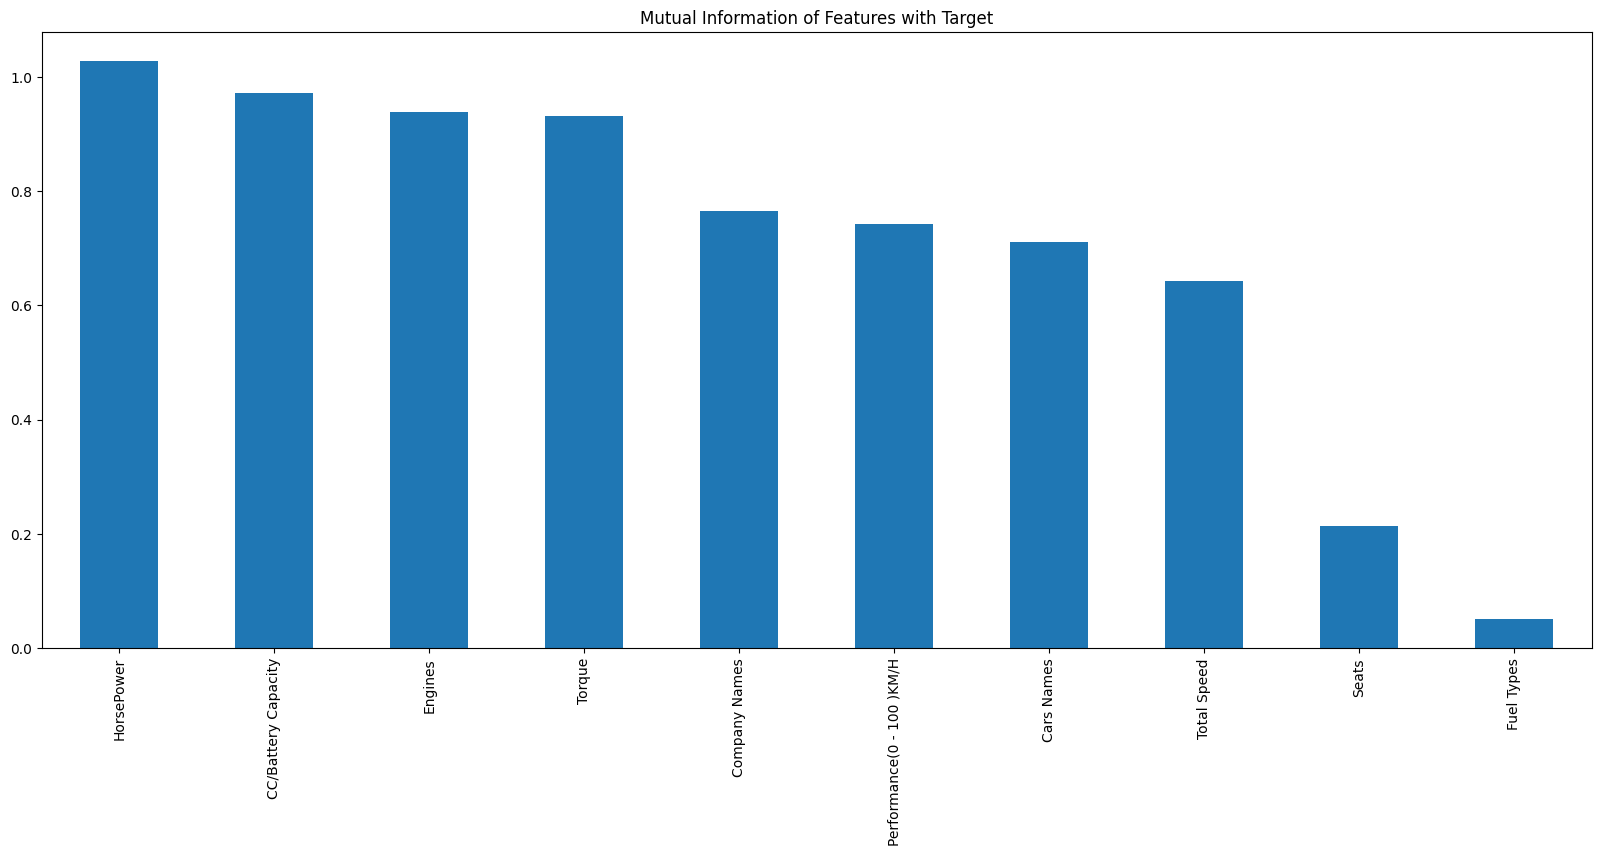

In [59]:
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import pandas as pd

# Mutual Information
mi = mutual_info_regression(x_train_encoded_clean.fillna(0), y_train_cleaned_final)

# Create Series
mi_series = pd.Series(mi, index=x_train_encoded_clean.columns).sort_values(ascending=False)

# Print results
print("\nMutual Information Scores:\n", mi_series)

# Plot results
plt.figure(figsize=(20, 8))
mi_series.plot.bar()
plt.title("Mutual Information of Features with Target")
plt.show()
